# Titanic example

This notebook loads a toy example, with three passengers, and uses a squared distance classifier, inspired by Machine Learning with Quantum Computers by Schuld and Petruccione.

Import modules needed:

In [1]:
from pathlib import Path
import numpy as np

HOME_DIR = '..'
BASE_DIR = Path(HOME_DIR)

import sys
sys.path.append(HOME_DIR)

from config.config import DATA
PROJECT = '01_titanic'
FOLDER = 'processed'
FILE = 'processed_data.csv'

from src.modules.data_helper_functions import read_csv, find_gamma_m
from src.modules.graph_functions import plot_simple_scatter

In [2]:
file_path = BASE_DIR.joinpath(DATA).joinpath(PROJECT).joinpath(FOLDER).joinpath(FILE)
print(f'Data will be loaded from {file_path}')

Data will be loaded from ..\data\01_titanic\processed\processed_data.csv


In [3]:
data = read_csv(file_path)

In [4]:
print(data)

[{'passenger': 'Passenger1', 'raw_price': '8500', 'raw_cabin': '910', 'price': '0.85', 'cabin': '0.364', 'survived': '1'}, {'passenger': 'Passenger2', 'raw_price': '1200', 'raw_cabin': '2105', 'price': '0.12', 'cabin': '0.842', 'survived': '0'}, {'passenger': 'Passenger3', 'raw_price': '7800', 'raw_cabin': '1121', 'price': '0.78', 'cabin': '0.4484', 'survived': ''}]


In [5]:

labels, x1, x2, y = [], [], [], []

for row in data:
    labels.append(row['passenger'])
    x1.append(float(row['price']))
    x2.append(float(row['cabin']))
    y_val = (row['survived'])
    if y_val:
        y.append(int(y_val))
    else:
        y.append(y_val)

In [6]:
print(labels)
print(x1)
print(x2)
print(y)

['Passenger1', 'Passenger2', 'Passenger3']
[0.85, 0.12, 0.78]
[0.364, 0.842, 0.4484]
[1, 0, '']


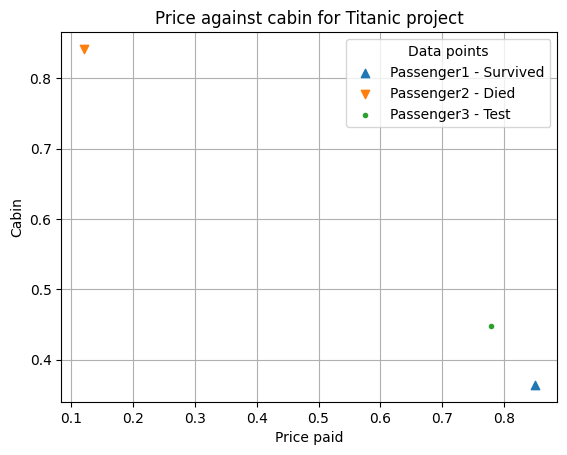

In [7]:
plot_simple_scatter(x1, x2, labels, y)

Calculate the square distance classifier:

First find the test data:

In [12]:
for i, items in enumerate(y):
    print(i, items)
    if items == '':
        x = np.array([x1[i],x2[i]])
if x.shape != (2,):
    raise Exception(f'x,shape should be (2,), is {x.shape}')
print(f'The test is {x}')

0 1
1 0
2 
The test is [0.78   0.4484]


calculate p(y=1)


In [14]:
M0, M1, p0, p1 = 0, 0, 0, 0
#xm = np.empty((0, 2))
for i, item in enumerate(y):
    #print(i, items)
    x_m = np.array([x1[i],x2[i]])
    if item == 1:
        M1 += 1
        p1 += find_gamma_m(x, x_m)
        print(f'For point {x_m} who survived gamma_m for point {x} is {p1}')
    elif item == 0:
        M0 += 1
        p0 += find_gamma_m(x, x_m)
        print(f'For point {x_m} who died the gamma_m for point {x} is {p0}')
    elif item != '':
        raise Exception('Value of y is {item} which is not allowed') 



For point [0.85  0.364] who survived gamma_m for point [0.78   0.4484] is 0.98797664
For point [0.12  0.842] who died the gamma_m for point [0.78   0.4484] is 0.40947904


In [10]:
p0, p1 = p0/M0, p1/M1
total = p0 + p1
p0, p1 = p0/total, p1/total

In [15]:
print(f'The probability that the test passenger dies is {p0:.2f}')
print(f'The probability that the test passenger survives is {p1:.2f}')

if p1 > p0:
    print('The classifier predicts survival')
else:
    print('The classifier predicts death')

The probability that the test passenger dies is 0.41
The probability that the test passenger survives is 0.99
The classifier predicts survival
